In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_filter1d

In [47]:
file_path = 'headlines/merged_file.csv'
data = pd.read_csv(file_path)

In [48]:
data['date'] = pd.to_datetime(data['date'])

In [49]:
analyzer = SentimentIntensityAnalyzer()

In [43]:
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

In [44]:
data['sentiment_score'] = data['headline'].apply(get_sentiment_score)

In [45]:
data = data.sort_values(by='date')

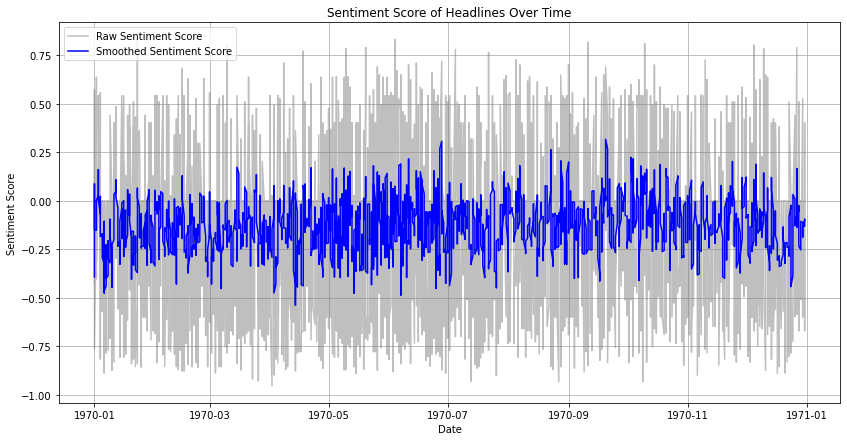

In [46]:
# Apply Gaussian filter to smooth the sentiment scores
data['smoothed_sentiment'] = gaussian_filter1d(data['sentiment_score'], sigma=2)

# Plot the sentiment scores over time
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['sentiment_score'], label='Raw Sentiment Score', color='gray', alpha=0.5)
plt.plot(data['date'], data['smoothed_sentiment'], label='Smoothed Sentiment Score', color='blue')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score of Headlines Over Time')
plt.legend()
plt.grid(True)
plt.show()